In [1]:
# Import required libraries
import pandas as pd
import numpy as np

# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import pandasql as psql

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
#from itertools import cycle

from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

#from scipy import interp


# Ignore warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the letter recognition dataset

lettersdata = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\51 season Multinomial Classifier 02-Aug-2021\letter-recognition.csv",header=0)
lettersdata.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
# Display the dataset information

lettersdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
# Display the count of each letter

lettersdata['letter'].value_counts(sort=False)

A    789
O    753
J    747
B    766
Q    783
V    764
Y    786
C    736
Z    734
F    775
E    768
K    739
H    734
X    787
P    803
I    755
T    796
D    805
G    773
U    813
R    758
M    792
W    752
S    748
L    761
N    783
Name: letter, dtype: int64

In [5]:
# Identify the dependent and Target variables

IndepVar = []
for col in lettersdata.columns:
    if col != 'letter':
        IndepVar.append(col)

TargetVar = 'letter'

x = lettersdata[IndepVar]
y = lettersdata[TargetVar]

In [6]:
# Impoert LabelEncoder and convert the target variable from objectto integer values

from sklearn import preprocessing

# creating labelEncoder

le = preprocessing.LabelEncoder()

# Converting string labels into numbers

y = le.fit_transform(y)
y = pd.DataFrame(y)

In [7]:
# Display the target values after LabelEncoder

y.value_counts(sort=False)

0     789
1     766
2     736
3     805
4     768
5     775
6     773
7     734
8     755
9     747
10    739
11    761
12    792
13    783
14    753
15    803
16    783
17    758
18    748
19    796
20    813
21    764
22    752
23    787
24    786
25    734
dtype: int64

In [8]:
# Split the dataset into train and test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 12)
x_test_F1 = x_test.copy()

In [10]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression
from math import sqrt

modelLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                            intercept_scaling=1, max_iter=100, multi_class='auto',
                            n_jobs=None, penalty='l2', random_state=None,
                            solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

modelLR = modelLR.fit(x_train,y_train)

# Predict the model with test data set

y1_pred = modelLR.predict(x_test)
y1_pred_proba = modelLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y1_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y1_pred

# Class = Label 0-3

lst_classes = [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}\n".format(no_class));
    
    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    x = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(x), 3)

    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}\n".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[195   1   1   1   0   0   2   1   0   3   1   1   2   3   2   0   3   6
    2   0   3   0   0   0   0   0]
 [  0 186   1  19   2   2   2   4   2   0   3   1   2   1   0   2   7  16
   14   4   0   2   1   0   0   1]
 [  0   0 164   0   0   1  20   0   0   0   3   0   0   1   2   0   0   1
    0   0   2   0   0   1   0   0]
 [  1   4   1 184   1   2   1  11   2   4   2   0   2   5   8   0   1   3
    4   1   0   2   1   4   3   0]
 [  0   1  11   2 158   0   4   0   0   0  10   9   0   0   1   1   7   1
    4   7   0   0   0   8   0  20]
 [  0   4   0   1   1 173   0   4   2   5   0   0   0   1   0  19   0   1
    6   1   0   1   0   0   7   1]
 [  0   2  16   1  11   3 119   1   0   0   8   6   0   0   3   5  12   2
    5   4   1   1   0   2   0   0]
 [  1   3   2   6   0   1   2 100   0   4   3   0   2   8  34   2   1   2
    0   1   8   1   4   0   0   0]
 [  0   6   0   1   1   0   0   0 202   5   0   0   0   0   0   0   1   0
    5   1   0   0   0   5   0   0]
 [  2   0   0   2  

In [11]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall Performance Prediction:
Accuracy: 98.2154%
Precision: 76.5846%
Recall or Sensitivity: 76.5346%
F1-Score: 0.7645
Specificity or True Nagative Rate: 99.0692%
Balanced Accuracy: 87.7962%

MCC: 0.7558



In [12]:
# fit OneVsRestClassifier model to calculate the ROC AUC and plot ROC curve

from sklearn.multiclass import OneVsRestClassifier

modelORC = OneVsRestClassifier(LogisticRegression())
modelORC.fit(x_train, y_train)
y1_pred = modelORC.predict(x_test)
y1_pred_proba = modelORC.predict_proba(x_test)
print(y1_pred_proba)



[[2.37722350e-04 8.76898498e-04 1.33547384e-01 ... 1.36570417e-04
  1.76927048e-06 2.36242560e-09]
 [7.50217356e-02 5.66097897e-04 5.62248901e-03 ... 4.39850154e-03
  5.24359019e-02 3.71449474e-04]
 [3.77026564e-05 4.43550929e-02 2.05188802e-03 ... 6.87490797e-02
  4.12221131e-05 1.34194219e-02]
 ...
 [3.70172675e-04 7.32442004e-03 3.17022094e-03 ... 8.43620659e-07
  5.48022383e-07 1.23682634e-09]
 [2.93541168e-05 1.29043620e-01 8.32820781e-05 ... 1.22665100e-03
  1.96188036e-04 1.77587352e-05]
 [7.38596749e-01 1.27924807e-03 2.15513082e-06 ... 2.63063462e-02
  1.91321814e-05 9.76981764e-06]]


In [13]:
# ROC curve for multiple classes

fpr = {}
tpr = {}
thresh ={}

n_class = 26

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y1_pred_proba[:,i], pos_label=i)

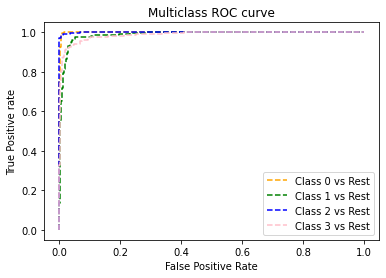

In [14]:
# Plotting ROC curves for all classes

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 4 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 5 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 6 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 7 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 8 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [18]:
#ROC AUC score

ROC_AUC_Score = roc_auc_score(y_test, y1_pred_proba, multi_class='ovr', average='weighted')
print(ROC_AUC_Score)

0.9936936081384194


# Bagging Classifier Algorithm

In [19]:
# Training bagging classifier - BaggingClassifier class of 'sklearn.ensemble' packages to build bagging classifier model.
# We set LogisticRegression as a base estimator and set 100 to the number of estimators, then train the model
# with train data.

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='auto',
n_jobs=None, penalty='l2', random_state=None,
solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

modelBAG = BaggingClassifier(base_estimator=modelLR,
n_estimators=100, # number of LR models to create
max_samples=1.0, # each model is trained from randomly sampled 1 instance
max_features=1.0,
bootstrap=True, # set to False to use Pasting instead of Bagging
bootstrap_features=False,
oob_score=False,
warm_start=False,
n_jobs=None,
random_state=None,
verbose=0)

modelBAG.fit(x_train,y_train)

# Predict model with test data

y2_pred = modelBAG.predict(x_test)
y2_pred_proba = modelBAG.predict_proba(x_test)

C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vishnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [21]:
# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y2_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y2_pred

# Class = Label 0-3

lst_classes = [0, 1, 2, 3]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    x = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(x), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[230   0   2   0]
 [  2 200   2  20]
 [  7   1 248   0]
 [  4  12   0 207]]
Print Class: 0
TP=230, FP=2, TN=690, FN=13
Accuracy: 0.984
Precision: 0.991
Sensitivity: 0.947
F1-Score: 0.968
Specificity: 0.997
Balanced Accuracy: 0.972
MCC: 0.958

Print Class: 1
TP=200, FP=24, TN=698, FN=13
Accuracy: 0.96
Precision: 0.893
Sensitivity: 0.939
F1-Score: 0.915
Specificity: 0.967
Balanced Accuracy: 0.953
MCC: 0.89

Print Class: 2
TP=248, FP=8, TN=675, FN=4
Accuracy: 0.987
Precision: 0.969
Sensitivity: 0.984
F1-Score: 0.976
Specificity: 0.988
Balanced Accuracy: 0.986
MCC: 0.968

Print Class: 3
TP=207, FP=16, TN=692, FN=20
Accuracy: 0.961
Precision: 0.928
Sensitivity: 0.912
F1-Score: 0.92
Specificity: 0.977
Balanced Accuracy: 0.944
MCC: 0.895



In [ ]:
# Fit OneVsRestClassifier model to calculate ROC AUC score and plot ROC curves

from sklearn.multiclass import OneVsRestClassifier

modelORC = OneVsRestClassifier(BaggingClassifier(base_estimator=modelLR,
n_estimators=10, # number of SVC models to create
max_samples=1.0, # each model is trained from randomly sampled 1 instance
max_features=1.0,
bootstrap=True, # set to False to use Pasting instead of Bagging
bootstrap_features=False,
oob_score=False,
warm_start=False,
n_jobs=None,
random_state=None,
verbose=0))
modelORC.fit(x_train, y_train)
pred = modelORC.predict(x_test)
pred_prob = modelORC.predict_proba(x_test)

In [ ]:
# Fit OneVsRestClassifier model to calculate ROC AUC score and plot ROC curves

from sklearn.multiclass import OneVsRestClassifier

modelORC = OneVsRestClassifier(BaggingClassifier(base_estimator=modelLR,
n_estimators=10, # number of SVC models to create
max_samples=1.0, # each model is trained from randomly sampled 1 instance
max_features=1.0,
bootstrap=True, # set to False to use Pasting instead of Bagging
bootstrap_features=False,
oob_score=False,
warm_start=False,
n_jobs=None,
random_state=None,
verbose=0))
modelORC.fit(x_train, y_train)
pred = modelORC.predict(x_test)
pred_prob = modelORC.predict_proba(x_test)

In [ ]:
# Plotting ROC curves for all classes

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [ ]:
#ROC AUC score

ROC_AUC_Score = roc_auc_score(y_test, y2_pred_proba, multi_class='ovr', average='weighted')
print(ROC_AUC_Score)